# Oblig 2 - INFO284

### Imports of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
sns.set()

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

### Import dataset file

Import the dataset here, the path we have used is relative to this file in our git repository

In [3]:
df = pd.read_csv('../../../datasets/second_assignment/seeds_dataset.txt', sep="\s+", names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coeff", "kernel_groove_length", "wheat_type"])
# df = pd.read_csv('PATH', sep="\s+", names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coeff", "kernel_groove_length", "wheat_type"])

In [4]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,wheat_type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### Visualize unscaled data

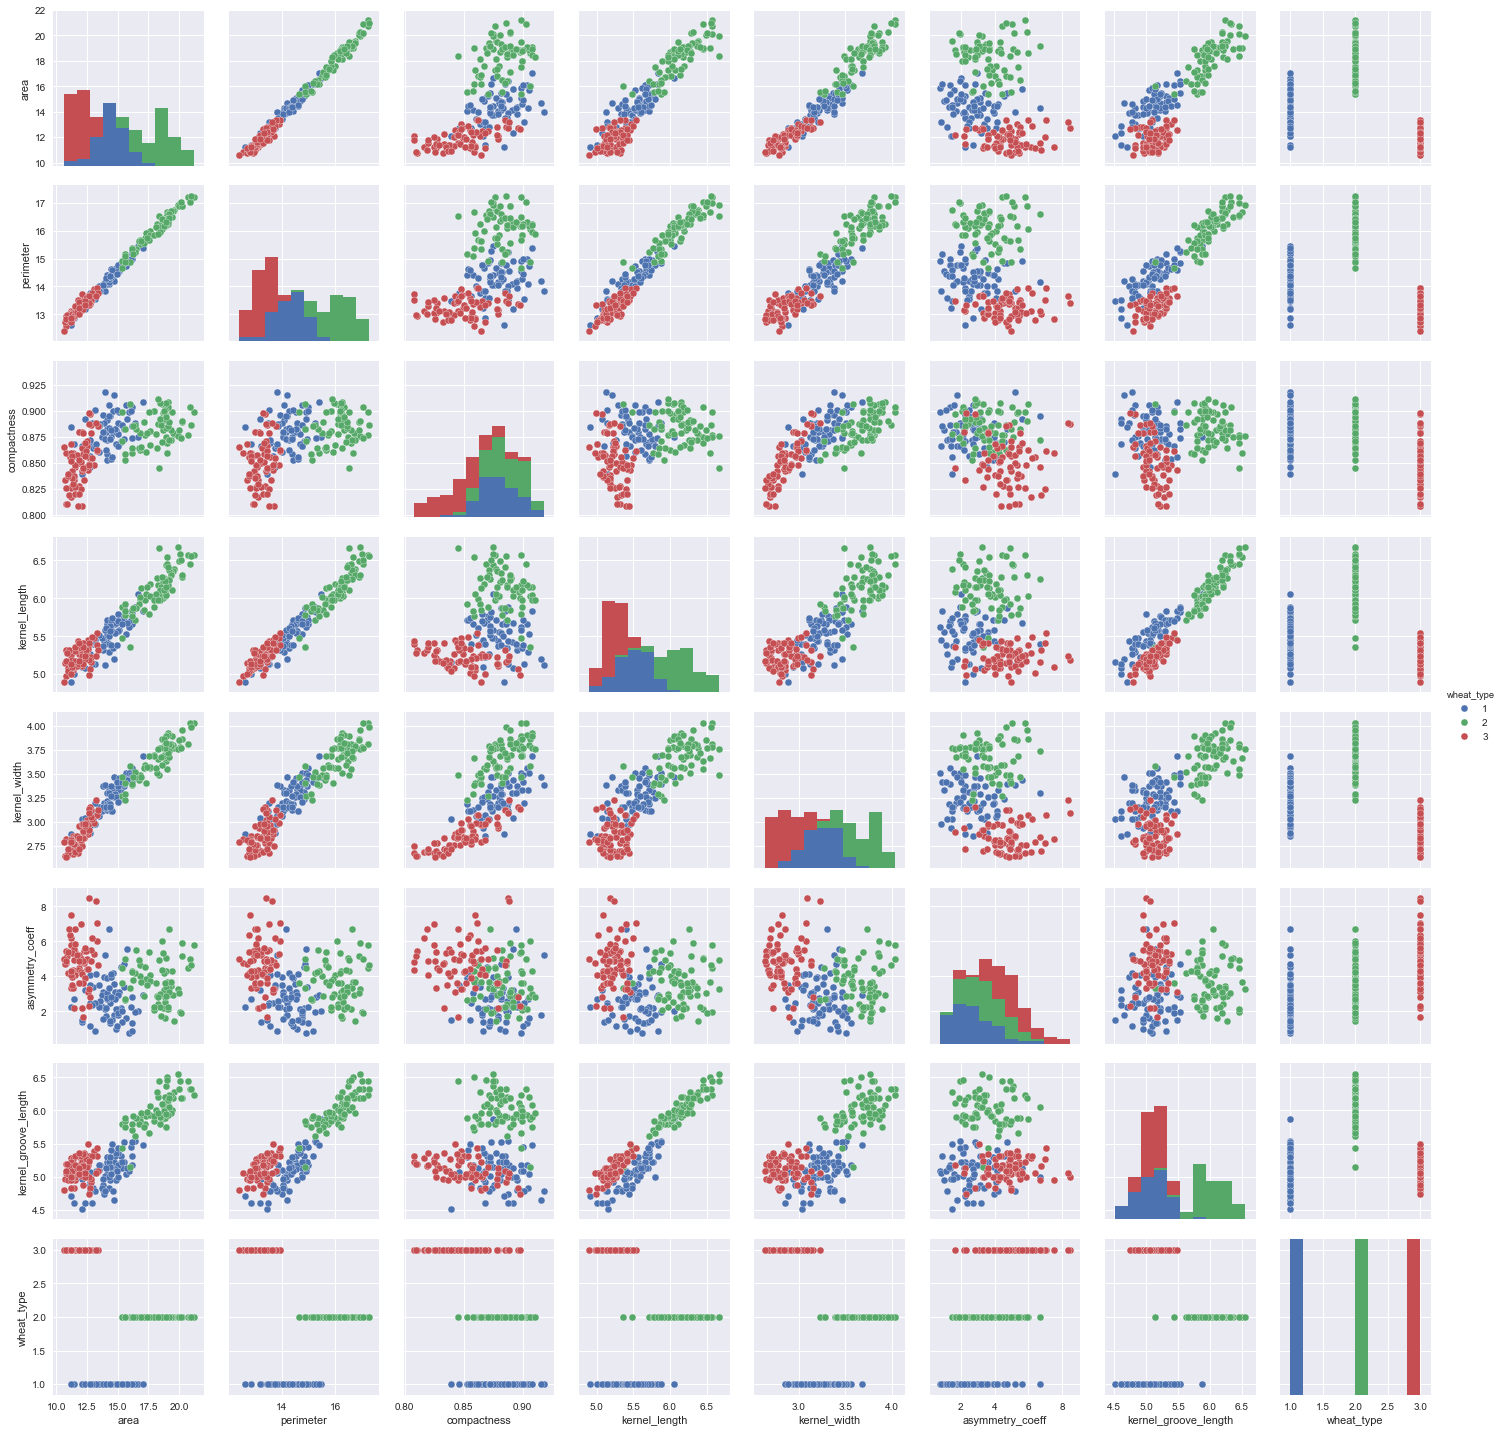

In [6]:
sns.pairplot(df, hue="wheat_type")

### Scale data set
In a setting where we do not know exactly which types of measurements that have been used for each feature,  
it is good precaution to scale these measurements so that one feature does not take precedence over another

In [7]:
## Drop pre-made classification
cleaned_set = df.drop(["wheat_type"], axis=1)

In [8]:
## Scale the feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_set[cleaned_set.columns] = scaler.fit_transform(cleaned_set[cleaned_set.columns])

In [9]:
cleaned_set.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.570767,0.410773,0.448043,0.381633,0.437751
std,0.274759,0.269826,0.214423,0.249473,0.269219,0.195498,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.442831,0.204533,0.223806,0.233575,0.258986
50%,0.355524,0.394628,0.593013,0.351633,0.432644,0.368474,0.346627
75%,0.634089,0.682851,0.723004,0.608530,0.664113,0.520570,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualize scaled data

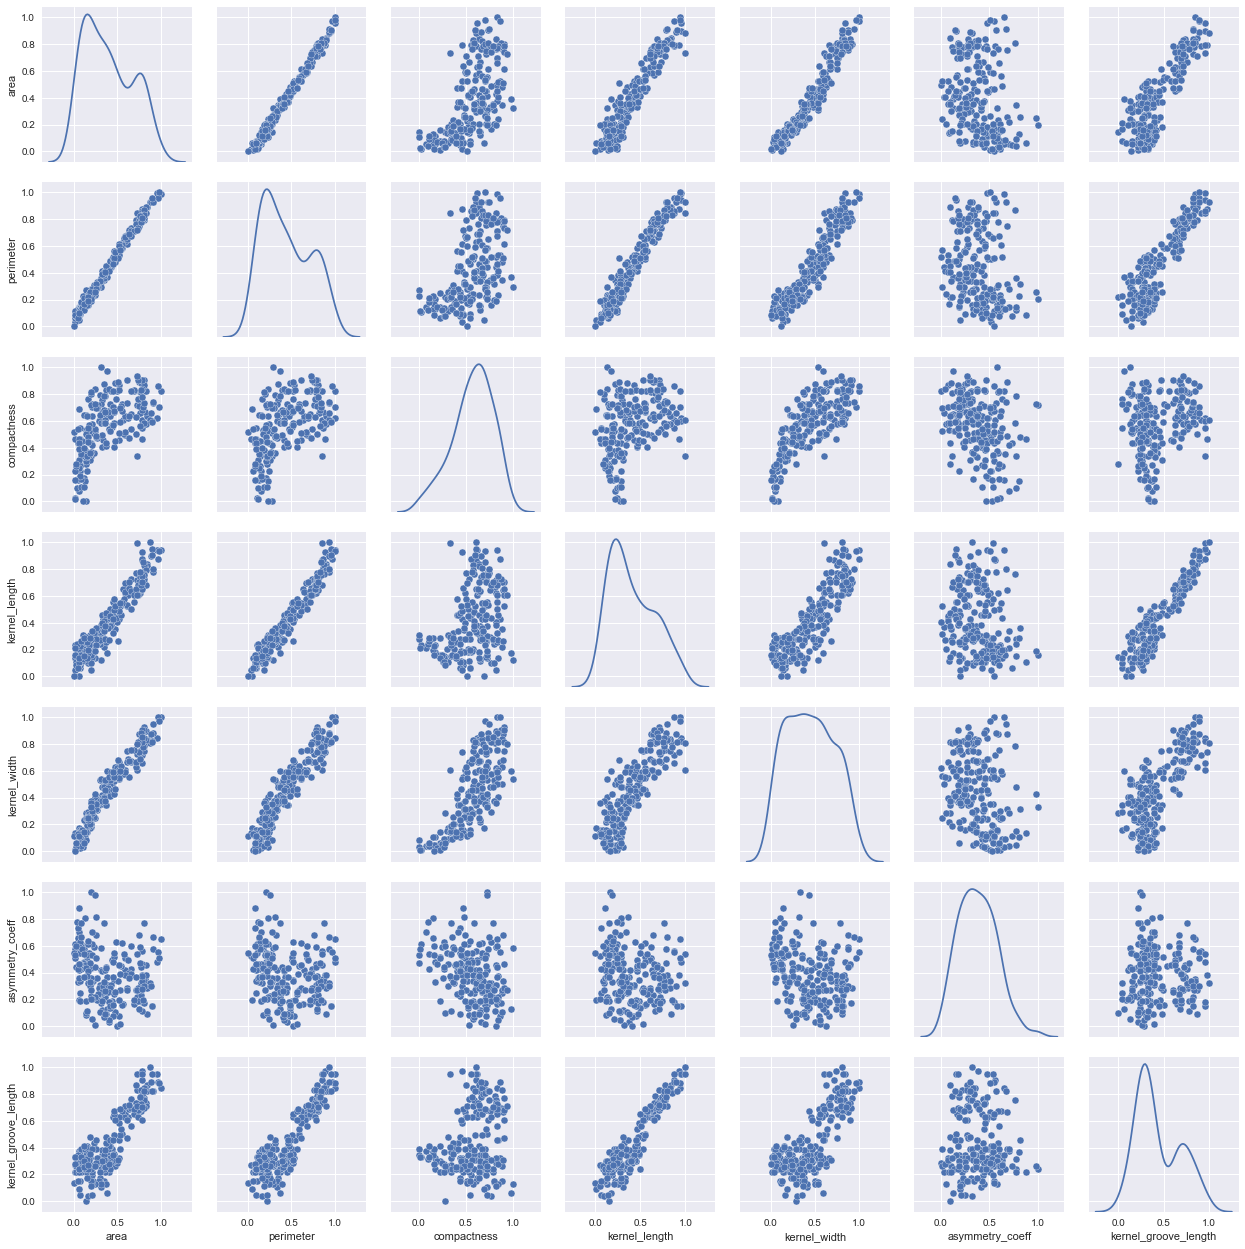

In [10]:
sns.pairplot(cleaned_set, diag_kind='kde')

#### Scaled data comment
We can now see that every feature has been scaled to have a max of 1 and a minimum of 0.  
The kernel density estimation on the diagonal also gives us a view of how the data is spread out.

### Determine how many clusters to use
If we were to ignore the fact that we know how many types the data has already been classified into, it would be wise to choose  
how many clusters we use based on some criterion. AIC and/or BIC can be used for this, to evaluate if we're overfitting a given model.  
The "GaussianMixtureModel" from the SciKit-Learn library has these built in.  

Extra information:  
https://en.wikipedia.org/wiki/Akaike_information_criterion  
https://en.wikipedia.org/wiki/Bayesian_information_criterion

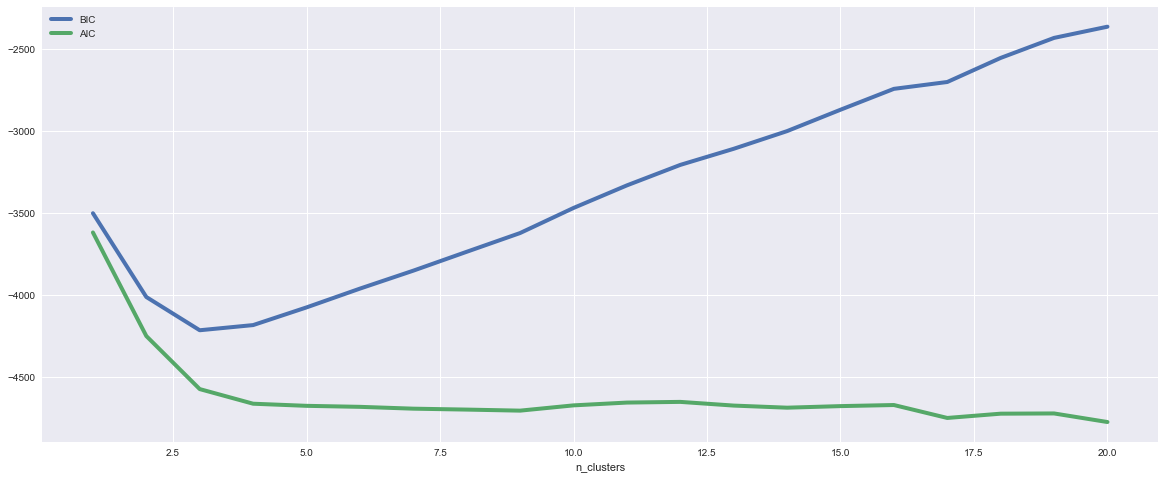

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,8))

n_clusters = np.arange(1, 21)
models = [GaussianMixture(n, random_state=0).fit(cleaned_set) for n in n_clusters]
ax1.plot(n_clusters, [m.bic(cleaned_set) for m in models], label='BIC', lw=4)
ax1.plot(n_clusters, [m.aic(cleaned_set) for m in models], label='AIC', lw=4)
ax1.set_xlabel('n_clusters')
ax1.legend()

#### Starting point
We see from the figure above that the results from AIC and BIC hit a low/"elbow" point around 3-4,  
thus this would be a reasonable starting point for how many clusters/catergories we are looking for.

### Fit data with K-Means clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
k_cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

In [14]:
#Fit with all features
k_cluster.fit(cleaned_set)
k_allfeatures_labels = k_cluster.labels_
k_all_centers = k_cluster.cluster_centers_

In [15]:
#Fit with a selection of features
k_cluster.fit(cleaned_set.drop(['area', 'perimeter'], axis=1))
k_selectedfeatures_labels = k_cluster.labels_
k_sf_centers = k_cluster.cluster_centers_

Text(0.5,0,'compactness')

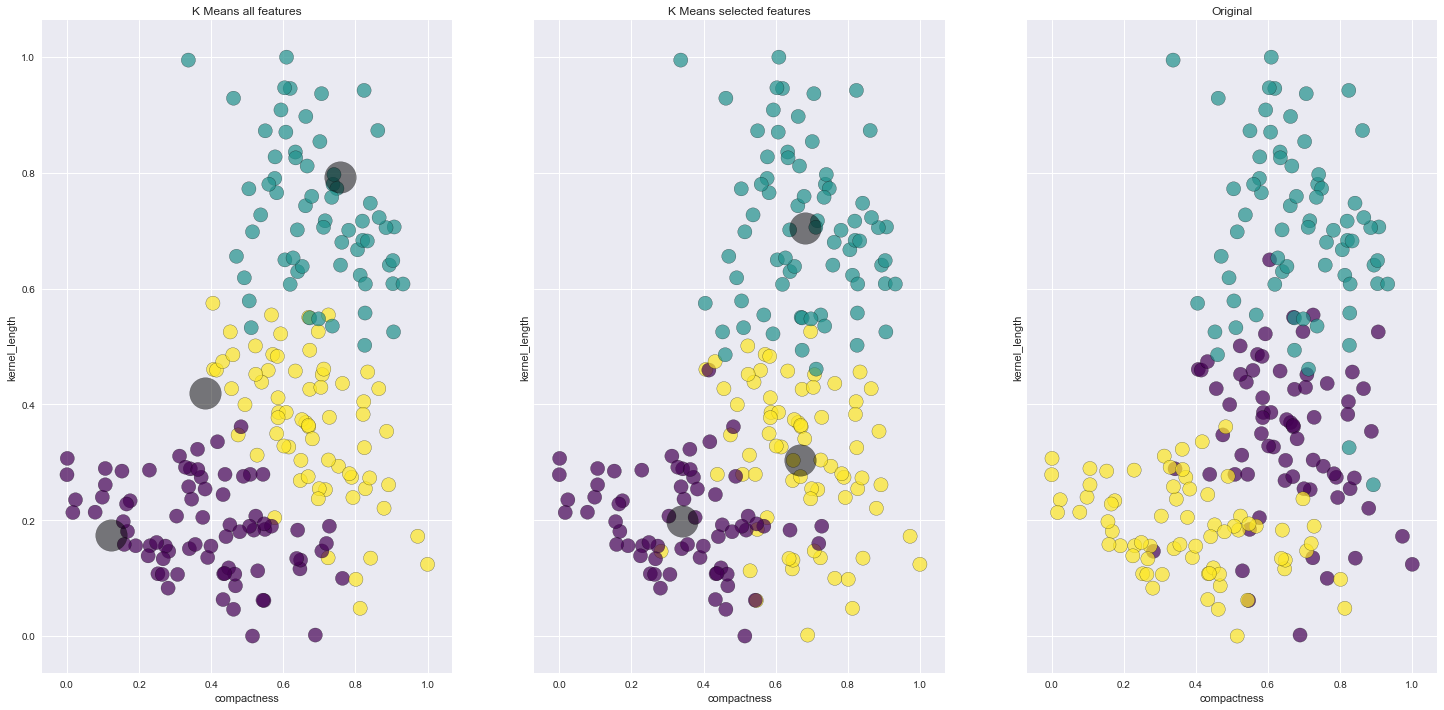

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,12), squeeze=True)

x_feature = 'compactness'
y_feature = 'kernel_length'

ax1.set_title("K Means all features")
ax1.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=k_allfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax1.scatter(k_all_centers[:,0], k_all_centers[:,1], c='black', s=1000, alpha=0.5)
ax1.set_ylabel(y_feature)
ax1.set_xlabel(x_feature)

ax2.set_title("K Means selected features")
ax2.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=k_selectedfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax2.scatter(k_sf_centers[:,0], k_sf_centers[:,1], c='black', s=1000, alpha=0.5)
ax2.set_ylabel(y_feature)
ax2.set_xlabel(x_feature)

ax3.set_title("Original")
ax3.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=df["wheat_type"], cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax3.set_ylabel(y_feature)
ax3.set_xlabel(x_feature)

### Comment and performance
As is known with the K Means clustering algorithm, it does not lend itself well to data that is spread out in a non-spherical fashion.  
This implies that if the clusters have complicated geometries, the cluster centers may not end up where you would except them to.  
This is further confirmed by looking at the plot where K Means have considered all the features in the data set.  
In the second plot where we have removed some of the features that had a diagonal spread (area, perimeter),  
we see that the centers align more closely to what you might have choosen by "eye-balling" where to put the centers.

In [17]:
#Elements 0-70
k_first_group_all = Counter(k_allfeatures_labels[:71])
k_first_group_selected = Counter(k_selectedfeatures_labels[:71])
#Elements 71-140
k_second_group_all = Counter(k_allfeatures_labels[71:141])
k_second_group_selected = Counter(k_selectedfeatures_labels[70:141])
#Elements 141-210
k_third_group_all = Counter(k_allfeatures_labels[141:])
k_third_group_selected = Counter(k_selectedfeatures_labels[141:])

print('Label counts from 0-70, 71-140, 141-210')
print('Using all features:')
print("0-70:", k_first_group_all.most_common(),"\n71-140:", k_second_group_all.most_common(), "\n141-210:", k_third_group_all.most_common())
print()
print('Using selected features:')
print("0-70:",k_first_group_selected.most_common(), "\n71-140:", k_second_group_selected.most_common(), "\n141-210:", k_third_group_selected.most_common())

Label counts from 0-70, 71-140, 141-210
Using all features:
0-70: [(2, 58), (0, 10), (1, 3)] 
71-140: [(1, 61), (2, 8), (0, 1)] 
141-210: [(0, 66), (2, 3)]

Using selected features:
0-70: [(2, 63), (1, 6), (0, 2)] 
71-140: [(1, 68), (2, 2), (0, 1)] 
141-210: [(0, 62), (2, 7)]


#### Precision
Since we know that from the original dataset the datapoints from index 0-70, 71-140, 141-210 belongs to seperate types (ground truth),  
we can calculate a precision score by taking the maximum of the label types in each range and divide it by the total number of datapoints.

In [18]:
k_presicion_all = (k_first_group_all.most_common()[0][1] + k_second_group_all.most_common()[0][1] + k_third_group_all.most_common()[0][1]) / k_allfeatures_labels.size
print("K Means precision with all features:", k_presicion_all)

K Means precision with all features: 0.8809523809523809


In [19]:
k_presicion_selected = (k_first_group_selected.most_common()[0][1] + k_second_group_selected.most_common()[0][1] + k_third_group_selected.most_common()[0][1]) / k_selectedfeatures_labels.size
print("K Means precision with selected features:", k_presicion_selected)

K Means precision with selected features: 0.919047619047619


## Fit data with Gaussian mixture models clustering

In [20]:
from sklearn.mixture import GaussianMixture

In [21]:
#Fit with all features
g_cluster = GaussianMixture(n_components=3, random_state=0, n_init=10).fit(cleaned_set)
g_allfeatures_labels = g_cluster.predict(cleaned_set)

In [22]:
#Fit with a selection of features
g_cleaned_set_reduced = cleaned_set.drop(['area', 'perimeter'], axis=1)
g_cluster = GaussianMixture(n_components=3, random_state=0, n_init=10).fit(g_cleaned_set_reduced)
g_selectedfeatures_labels = g_cluster.predict(g_cleaned_set_reduced)

Text(0.5,0,'compactness')

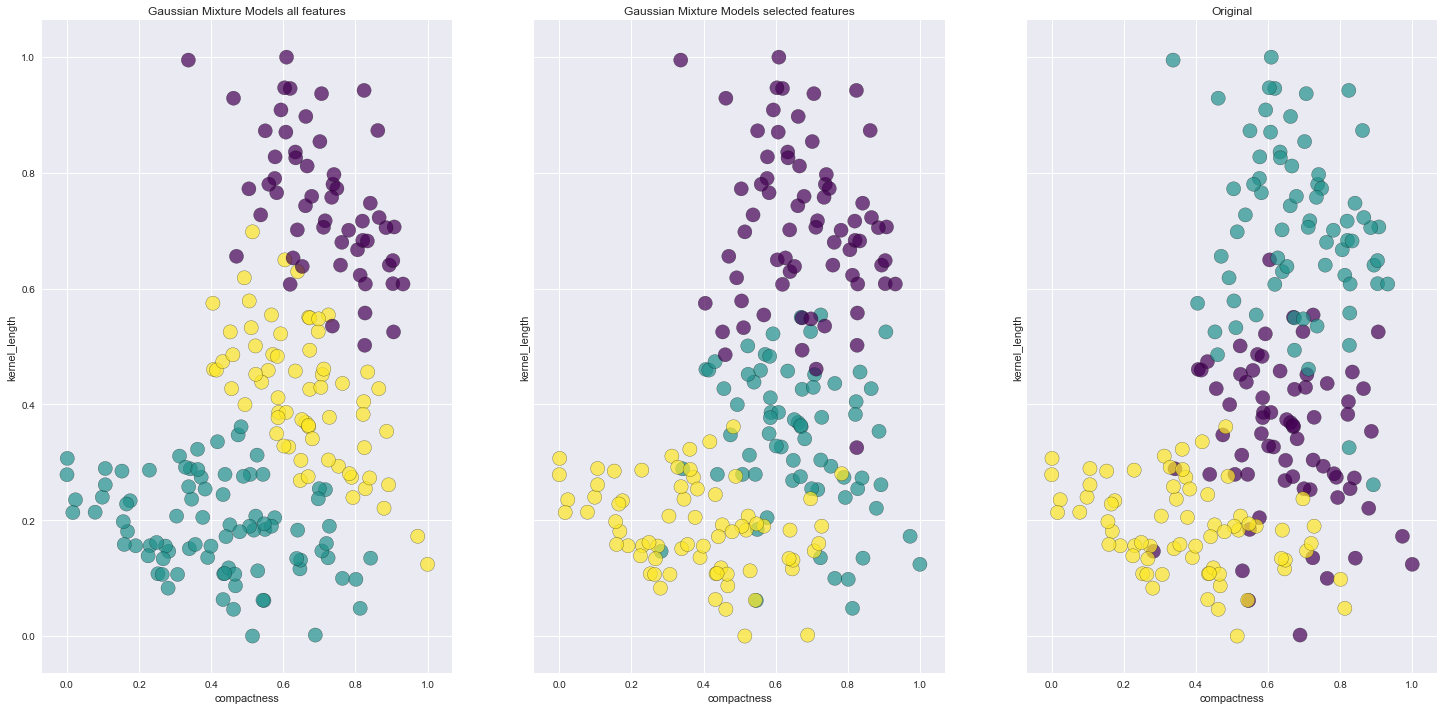

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,12), squeeze=True)

x_feature = 'compactness'
y_feature = 'kernel_length'

ax1.set_title("Gaussian Mixture Models all features")
ax1.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=g_allfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax1.set_ylabel(y_feature)
ax1.set_xlabel(x_feature)

ax2.set_title("Gaussian Mixture Models selected features")
ax2.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=g_selectedfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax2.set_ylabel(y_feature)
ax2.set_xlabel(x_feature)

ax3.set_title("Original")
ax3.scatter(cleaned_set[x_feature], cleaned_set[y_feature], c=df["wheat_type"], cmap='viridis' , s=200, edgecolors='black', alpha=0.7)
ax3.set_ylabel(y_feature)
ax3.set_xlabel(x_feature)

### Comment and performance
K Means clustering is generally not flexible enough to fit clusters that does not naturally have a circular shape. This means that points that land in between the "circular bounds" of the K Means clusters may get mixed,  
and there is no definition of how probable it is that one point belongs to a cluster versus another. Gaussian Mixture Models does not suffer from the aforementioned problems.  
It will be able to fit data sets that have more "problematic" shapes, e.g elliptical shapes.  
As we can see in the second plot, dropping the features *area* and *perimeter* increases the performance significantly as it did for the K Means clustering.

In [24]:
#Elements 0-70
g_first_group_all = Counter(g_allfeatures_labels[:71])
g_first_group_selected = Counter(g_selectedfeatures_labels[:71])
#Elements 71-140
g_second_group_all = Counter(g_allfeatures_labels[71:141])
g_second_group_selected = Counter(g_selectedfeatures_labels[71:141])
#Elements 141-210
g_third_group_all = Counter(g_allfeatures_labels[141:])
g_third_group_selected = Counter(g_selectedfeatures_labels[141:])

print('Label counts from 0-70, 71-140, 141-210')
print('Using all features:')
print("0-70:", g_first_group_all.most_common(),"\n71-140:", g_second_group_all.most_common(), "\n141-210:", g_third_group_all.most_common())
print()
print('Using selected features:')
print("0-70:", g_first_group_selected.most_common(),"\n71-140:", g_second_group_selected.most_common(), "\n141-210:", g_third_group_selected.most_common())

Label counts from 0-70, 71-140, 141-210
Using all features:
0-70: [(2, 52), (1, 17), (0, 2)] 
71-140: [(0, 54), (2, 15), (1, 1)] 
141-210: [(1, 69)]

Using selected features:
0-70: [(1, 66), (2, 3), (0, 2)] 
71-140: [(0, 68), (1, 1), (2, 1)] 
141-210: [(2, 67), (1, 2)]


#### Precision
We calucate precision in the samme manner as we did with the K Means algorithm

In [25]:
g_presicion_all = (g_first_group_all.most_common()[0][1] + g_second_group_all.most_common()[0][1] + g_third_group_all.most_common()[0][1]) / g_allfeatures_labels.size
print ("Gaussian Mixture Model precision with all features:", g_presicion_all, "\n")

Gaussian Mixture Model precision with all features: 0.8333333333333334 



In [26]:
g_presicion_selected = (g_first_group_selected.most_common()[0][1] + g_second_group_selected.most_common()[0][1] + g_third_group_selected.most_common()[0][1]) / g_selectedfeatures_labels.size
print ("Gaussian Mixture Model precision with selected features:", g_presicion_selected, "\n")

Gaussian Mixture Model precision with selected features: 0.9571428571428572 



### Before last comparison
We are going to  use *t-distributed Stochastic Neighbor Embedding* to reduce the dimensionality of our dataset so that we can have a 2 feature  
representation of the whole dataset and map our result to the datapoints from the reduction.  

In [27]:
from sklearn.manifold import TSNE
pca = TSNE(n_components=2, perplexity=35)
reduced_set = pca.fit_transform(cleaned_set)

#### Below you will see the best results compared to the original in scatter plots based on the data set with reduced dimensionality

Text(0.5,0,'x_reduced')

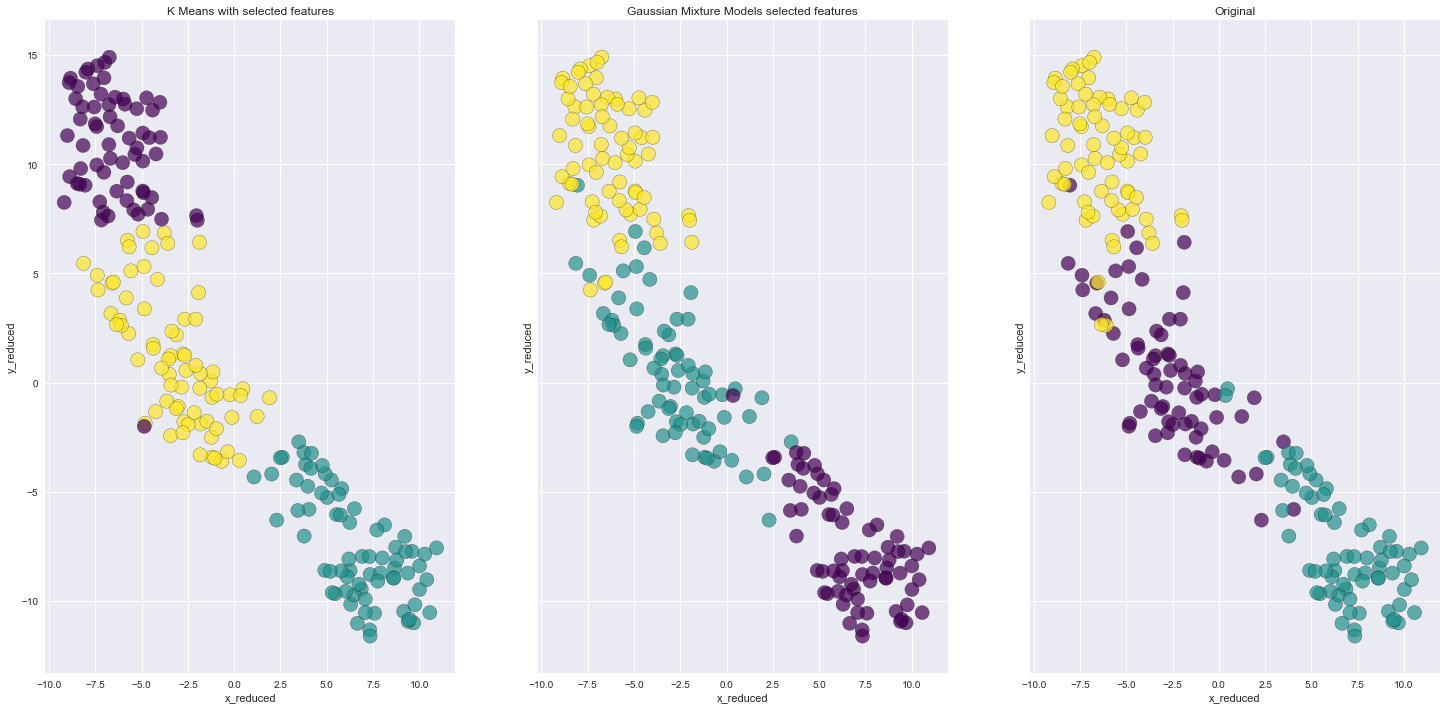

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,12), squeeze=True)

ax1.set_title("K Means with selected features")
ax1.scatter(reduced_set[:,0], reduced_set[:,1], c=k_selectedfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax1.set_ylabel('y_reduced')
ax1.set_xlabel('x_reduced')

ax2.set_title("Gaussian Mixture Models selected features")
ax2.scatter(reduced_set[:,0], reduced_set[:,1], c=g_selectedfeatures_labels, cmap='viridis', s=200, edgecolors='black', alpha=0.7)
ax2.set_ylabel('y_reduced')
ax2.set_xlabel('x_reduced')

ax3.set_title("Original")
ax3.scatter(reduced_set[:,0], reduced_set[:,1], c=df["wheat_type"], cmap='viridis' , s=200, edgecolors='black', alpha=0.7)
ax3.set_ylabel('y_reduced')
ax3.set_xlabel('x_reduced')